# Practical Python Programming for Biologists
Author: Dr. Daniel Pass | www.CompassBioinformatics.com

---

# Day 4 Project Challenge - Covid dataset with modules

In this exercise we are going to look at a complex dataset (n=126) of covid S protein reference sequences and associated metadata and statistics, and we're going to use some 3rd party modules to perform some higher-level analysis.

As we have seen today there are many (many!) ways to approach any dataset. First consider a question that you want to test from this data. If you are more interested in statistical testing then you can focus on the metadata and statistics with pandas/scipy. If you are more interested in sequence bioinformatics then you can work with the fasta data. However you'll likely need both to fully investigate.

You have been provided with two files:
- ```Day3-Project-nextclade_metadata``` - Data & Metadata of 126 reference covid19 strains and the Spike (S) protein modificiation data
- ```Day3-Project-nextclade.fasta``` - Reference fasta sequence file for the corresponding spike proteins

Essential steps:
1. Read in and filter the metadata file to remove bad and missing data (pandas!)
2. Read in the fasta sequence file using biopython. Only include sequences that have passed your step one filter!
3. Now perform some analysis!

Some example challenges:
- A function to output the spike protein sequence and key statistics (GC%, length, etc)
- Calculate the number/size of gap regions (strings of Ns) - does this correspond with the quality assesment?
- A statistical test for if binding efficiency correlates with any other variables
- Test variations in sequence substitutions in metadata
- Calculate summary statistics per clade/strain
- Output a phylogenetic tree of strains (I think the full dataset may be too computaionally intensive for google Colab, however you could use one/two sequences per clade, or alternatively your own PCs)

This project is largely undefined and the intention is to give you a real-life look at approaching a dataset for the first time. Think about your objectives before jumping in! Good luck!


### Some statistics

In [8]:
import pandas as pd

## Read in metadata
df = pd.read_csv("C:/Users/danie/Google Drive/Work/CompassBioinformatics/Courses/IntroToPython/ClassData/Day3-Project-nextclade_metadata.csv")

print(df.columns)
print(df.head())

Index(['index', 'seqName', 'clade', 'Nextclade_pango', 'partiallyAliased',
       'clade_nextstrain', 'clade_who', 'clade_legacy', 'qc.overallScore',
       'qc.overallStatus', 'totalSubstitutions', 'totalDeletions',
       'totalInsertions', 'totalFrameShifts', 'totalMissing', 'totalNonACGTNs',
       'totalAminoacidSubstitutions', 'totalAminoacidDeletions',
       'totalAminoacidInsertions', 'totalUnknownAa', 'alignmentScore',
       'alignmentStart', 'alignmentEnd', 'coverage', 'substitutions',
       'bindingEfficiency'],
      dtype='object')
   index                                            seqName        clade  \
0      0                                           OX458355          23B   
1      1                                      IND/2930/2023          22F   
2      2  IMS-10116-CVDP-88333393-399B-4563-A7B1-14DFC5D...          21L   
3      3  IMS-10004-CVDP-63A4C3D8-D0DC-4A57-93D5-BB10D58...          22D   
4      4                         England/QEUH-3267E648/2022  recom

In [20]:
goodSamples = df[df["qc.overallStatus"] == "good"]
print(len(goodSamples))

print(goodSamples.groupby("clade_who")["totalAminoacidSubstitutions"].mean())

136
clade_who
Delta          30.500000
Epsilon        14.333333
Eta            19.000000
Kappa          21.333333
Lambda         21.000000
Mu             23.666667
Omicron        57.452830
Theta          20.000000
recombinant    45.571429
Name: totalAminoacidSubstitutions, dtype: float64


In [9]:
from scipy.stats import mannwhitneyu, spearmanr

corrs_to_test = ['totalAminoacidSubstitutions', 'totalAminoacidDeletions','totalAminoacidInsertions']

# All samples
for x in corrs_to_test:
    stat, pvalue = spearmanr(df[x], df["bindingEfficiency"])
    print("Spearman Rank test", x, "vs binding Efficiency")
    print("R2= {} (p={})".format(round(stat,3), round(pvalue, 5)))

print("================")
# 'good' samples
for x in corrs_to_test:
    stat, pvalue = spearmanr(goodSamples[x], goodSamples["bindingEfficiency"])
    print("Spearman Rank test", x, "vs binding Efficiency")
    print("R2= {} (p={})".format(round(stat,3), round(pvalue, 5)))



Spearman Rank test totalAminoacidSubstitutions vs binding Efficiency
R2= 0.974 (p=0.0)
Spearman Rank test totalAminoacidDeletions vs binding Efficiency
R2= 0.769 (p=0.0)
Spearman Rank test totalAminoacidInsertions vs binding Efficiency
R2= 0.032 (p=0.65916)


NameError: name 'goodSamples' is not defined

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

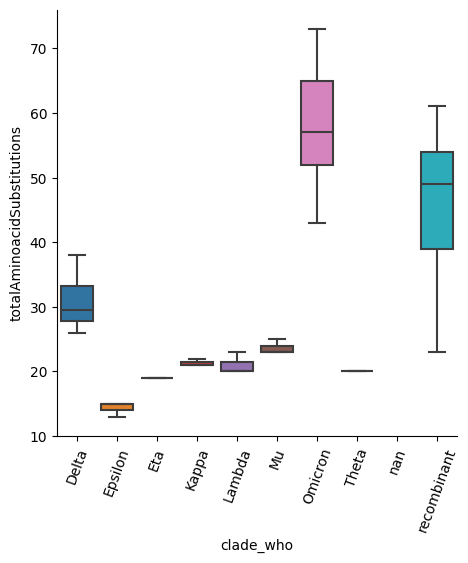

In [31]:
import seaborn as sns
print_order = sorted(set(goodSamples["clade_who"].astype(str)))

g = sns.catplot(data=goodSamples, kind="box", x="clade_who", y="totalAminoacidSubstitutions", order=print_order)

g.tick_params(axis='x', which='both', rotation=70)

### loading sequence data

In [18]:
print()
print(list(goodSamples["seqName"]))

['OX458355', 'IND/2930/2023', 'IMS-10004-CVDP-63A4C3D8-D0DC-4A57-93D5-BB10D58E8487', 'England/QEUH-3267E648/2022', 'OP958840', 'OP971202', 'OP955488', 'OP971186', 'OP955486', 'OX345943', 'OX339384', 'OP523232', 'OX245426', 'OP333110', 'OP332458', 'OP334332', 'OP339227', 'ON895103', 'ON895548', 'ON537316', 'ON626380', 'ON627541', 'ON627543', 'ON396327', 'ON544567', 'ON084447', 'OV950637 (XL)', 'OV940149 (XF)', 'OW018845 (XE)', 'OM990851 (XD)', 'OK016320 (XB)', 'OU219033 (XA)', 'IMS-10004-CVDP-E64B5426-4FB5-4D41-AFEC-77D84720E886', 'USA/MA-CDCBI-CRSP_URIKNCKBF5674VF4/2021', 'CAN/ON-NML-249359/2021', 'BEL/rega-20174/2021', 'USA/WA-UW-2181/2020', 'USA/MD-MDH-0082/2020', 'USA/UNKNOWN-UW-1403/2020', 'USA/UT-03435/2020', 'Switzerland/BS-UHB-42535085/2021', 'Switzerland/SO-ETHZ-531441/2020', 'Switzerland/BE-ETHZ-630376/2021', 'USA/AK-PHL8614/2021', 'USA/AK-PHL8565/2021', 'USA/CA-CDC-QDX22169637/2021', 'USA/TG278209/2020', 'USA/CO-CDPHE-2003260110/2020', 'England/MILK-74F4E4/2020', 'Switzerland

In [44]:
# Read in the fasta file as a biopython object
from Bio import SeqIO, Seq

# Read in the fasta file as a biopython object
strain_sequences = []
for seq_record in SeqIO.parse("C:/Users/danie/Google Drive/Work/CompassBioinformatics/Courses/IntroToPython/ClassData/Day3-Project-nextclade.fasta", "fasta"):
  #print(seq_record.id)
  if seq_record.id in list(goodSamples['seqName']):
    strain_sequences.append(seq_record)

print("Imported", len(strain_sequences), "'good' sequence records" )

Imported 37 'good' sequence records


#### Functions

In [24]:
def GC_pc(seq_record):
    sequence = seq_record.seq
    GC_pc = (sequence.count("G") + sequence.count("C")) / len(sequence) *100
    return round(GC_pc,2)

def number_of_gaps(seq_record, min_size):
    sequence = seq_record.seq
    N_sizes = []
    counter = 0
    for base in sequence:
        if base == "N":
            counter += 1
        else:
            if counter > min_size:
                N_sizes.append(counter)
            counter = 0

    return len(N_sizes)


findings = {}
for record in strain_sequences:
    #print(record.id)
    findings[record.id] = [GC_pc(record), number_of_gaps(record, 3)]
    #print(f"{record.id} \t {GC_pc(record)}% \t {number_of_gaps(record, 3)}")


for ID in findings.keys():
    GC, gaps = findings.get(ID)
    seq_qual = df.loc[df['seqName'] == ID, 'qc.overallStatus'].values
    if gaps >5:
        print("GC: {}%\tNo. gaps: {}\t{}\t{}".format(GC, gaps, seq_qual, ID))

GC: 36.26%	No. gaps: 6	['good' 'good' 'good' 'good' 'good']	OX458355
GC: 37.48%	No. gaps: 11	['good' 'good' 'good']	IND/2930/2023
GC: 36.74%	No. gaps: 9	[]	IMS10004CVDP63A4C3D8D0DC4A5793D5BB10D58E8487
GC: 37.79%	No. gaps: 7	['good']	OP958840
GC: 34.26%	No. gaps: 12	['mediocre']	ON629031
GC: 34.81%	No. gaps: 158	[]	USA/TXCDCASC210279141/2021
GC: 11.75%	No. gaps: 20	['bad']	LR991190
GC: 29.97%	No. gaps: 90	[]	USA/COCDPHE2007261261/2020
GC: 37.53%	No. gaps: 19	['good']	USA/TG278209/2020
GC: 34.8%	No. gaps: 7	['unknown']	SYC/G38725/2021
GC: 36.71%	No. gaps: 7	['unknown']	OU221273
GC: 37.32%	No. gaps: 8	[]	USA/NJPHEL2112068/2021
GC: 35.64%	No. gaps: 9	[]	USA/WAS5413/2021
GC: 37.23%	No. gaps: 12	[]	USA/IDCDCASC210011921/2021
GC: 36.17%	No. gaps: 13	[]	USA/VACDCLC0067096/2021
GC: 23.03%	No. gaps: 47	['bad' 'bad']	BHR/30005866/2021
GC: 36.12%	No. gaps: 30	[]	USA/CACDPH3000131458/2021
GC: 37.14%	No. gaps: 7	[]	USA/MACDCBICRSP_6XNVDTWZVHP437HT/2021
GC: 37.52%	No. gaps: 14	[]	USA/CACDCFG042304/20

### Align and Phylo

Using just first 15 sequences and first 2kb

Alignment with 37 rows and 10000 columns
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...GGT OX458355
AACAAACCAACCAACTTTTGATCTCTTGTAGATCTGTTCTCTAA...CAC IND/2930/2023
CTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAAT...ACC OP958840
AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCAC...CAG OP971202
CTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTA...TGT OP955488
AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCAC...CAG OP971186
ATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTAT...CTT OP955486
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...GGT OX345943
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...GGT OX339384
TTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTG...TTT OP523232
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...GGT OX245426
CTTTTGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAAT...ACC OP333110
CTTTTGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAAT...ACC OP332458
CTTTTGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAAT...ACC OP334332
TTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTG...TTT OP339227
CTTTTGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAAT...ACC ON8

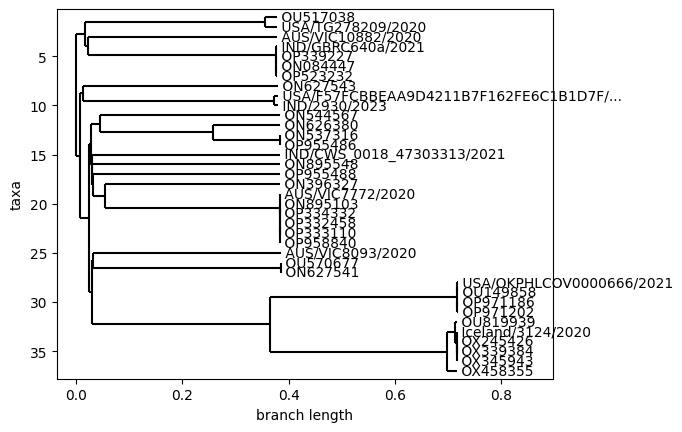

In [45]:
from Bio.Align import MultipleSeqAlignment
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

short_seqs = []
# Just the first 10kb
for record in strain_sequences:
    short_seqs.append(record[:10000])

aligned_seqs = MultipleSeqAlignment(short_seqs)
print(aligned_seqs)

# Calculate the distance matrix
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(aligned_seqs)

# Construct the phylogenetic tree using UPGMA
constructor = DistanceTreeConstructor()
tree = constructor.upgma(dm)

# Hide internal labels
for clade in tree.find_clades():
    if not clade.is_terminal():
        clade.name = None

# Draw the tree
Phylo.draw(tree)